In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

In [2]:
im = cv2.imread('elephant.jpg')
im = cv2.cvtColor(im, cv2.COLOR_BGR2RGB)
original_image = im.shape
print(im.shape)

(330, 500, 3)


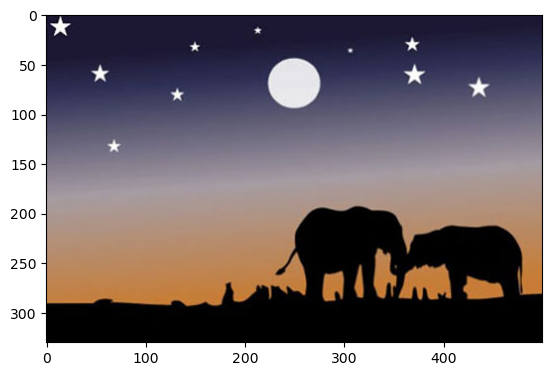

In [3]:
plt.imshow(im)
plt.show()

In [4]:
all_pixels = im.reshape((330 * 500),3)
print(all_pixels.shape)

(165000, 3)


In [5]:
from sklearn.cluster import KMeans
km = KMeans(n_clusters = 4)
km.fit(all_pixels)

KMeans(n_clusters=4)

In [6]:
centers = km.cluster_centers_
centers = np.array(centers, dtype='uint8')
print(centers)

[[ 38  35  65]
 [175 145 128]
 [100  96 118]
 [  1   0   1]]


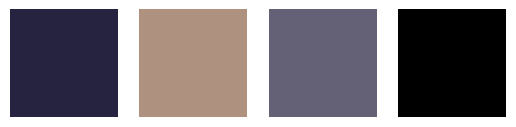

In [7]:
i = 1
colors = []
for each_col in centers:
    plt.subplot(1,4,i)
    plt.axis('off')
    i+=1

    colors.append(each_col)

    a = np.zeros((100,100,3), dtype = 'uint8')
    a[:,:,:] = each_col
    plt.imshow(a)
plt.show()

In [8]:
new_img = np.zeros((330 * 500,3), dtype = 'uint8')
print(new_img.shape)

(165000, 3)


In [9]:
colors

[array([38, 35, 65], dtype=uint8),
 array([175, 145, 128], dtype=uint8),
 array([100,  96, 118], dtype=uint8),
 array([1, 0, 1], dtype=uint8)]

In [10]:
km.labels_
print(km.labels_.shape)

(165000,)


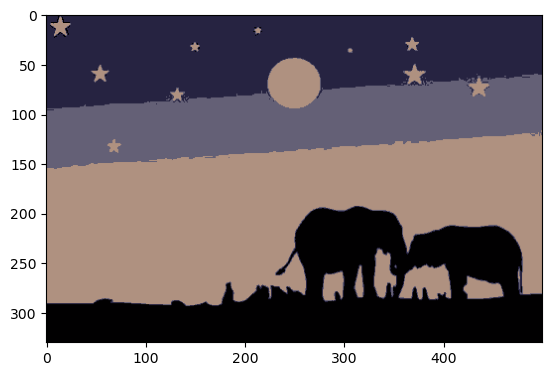

In [11]:
for i in range(new_img.shape[0]):
    new_img[i] = colors[km.labels_[i]]
    
new_img = new_img.reshape((original_image))
plt.imshow(new_img)
plt.show()